# Dados e Aprendizagem Automática
### Part VIII

## **Multi Layer Percepreton using Titanic Dataset - II**

#### Imports, installations and settings

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from IPython.display import display

from livelossplot import PlotLosses

from torchinfo import summary
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear, Sigmoid, ReLU, Softmax, Module
from torch.optim import SGD, Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.nn.init import xavier_uniform_, kaiming_uniform_

%matplotlib inline

device = torch.device("cpu")

#### FE and EDA on Titanic Dataset

In [3]:
df = pd.read_csv()

Inspect data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### Scale the data

In [6]:
min_age = df['Age'].min()
max_age = df['Age'].max()

df['Age'] = (df['Age'] - min_age)/

In [7]:
df['Age'].describe()

count    891.000000
mean       0.363679
std        0.163605
min        0.000000
25%        0.271174
50%        0.346569
75%        0.434531
max        1.000000
Name: Age, dtype: float64

In [8]:
min_fare = df['Fare'].min()
max_fare = df['Fare'].max()

df['Fare'] = /(max_fare - min_fare)

In [9]:
df['Fare'].

count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,2
1,2,1,1,0,0.472229,1,0,0.139136,0
2,3,1,3,0,0.321438,0,0,0.015469,2
3,4,1,1,0,0.434531,1,0,0.103644,2
4,5,0,3,1,0.434531,0,0,0.015713,2


Save dataset into a new file

In [11]:
t = pd.DataFrame(df)
filename = 
t.to_csv(filename, index=False, encoding='utf-8')

**Target: *Pclass***

In [12]:
df_X = t.drop('Pclass', axis=1)
df_X.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,1,0.271174,1,0,0.014151,2
1,2,1,0,0.472229,1,0,0.139136,0
2,3,1,0,0.321438,0,0,0.015469,2
3,4,1,0,0.434531,1,0,0.103644,2
4,5,0,1,0.434531,0,0,0.015713,2


In [13]:
t_X = pd.DataFrame(df_X)
filename = 
t_X.to_csv(filename, index=False, encoding='utf-8')

In [14]:
df_y = t['Pclass']
df_y.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [15]:
t_y = pd.DataFrame(df_y)
filename = 
t_y.to_csv(filename, index=False, encoding='utf-8')

#### Data Preparation

In [16]:
class CSVDataset(Dataset):
    def __init__(self, path):

        df_X = pd.read_csv(".csv", header=0)
        df_y = pd.read_csv(".csv", header=0)

        self.X = df_X.values
        self.y = df_y.values[:, 0]-1

        self.X = self.X.astype('float32')
        self.y = torch.tensor(self.y, dtype=torch.long, device=device)
        
    def __len__(self):
        return len(self.X)
 
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    def get_splits(self, n_test):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])
    
def prepare_data(df, n_test):
    dataset = CSVDataset(df)
    train, test = dataset.get_splits(n_test)
    train_dl = DataLoader(train, batch_size=len(train), shuffle=True)
    test_dl = DataLoader(test, batch_size=len(train), shuffle=True)
    return train_dl, test_dl

In [17]:
train_dl, test_dl = prepare_data(, )

#### Data balance

In [18]:
display(df_X)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,1,0.271174,1,0,0.014151,2
1,2,1,0,0.472229,1,0,0.139136,0
2,3,1,0,0.321438,0,0,0.015469,2
3,4,1,0,0.434531,1,0,0.103644,2
4,5,0,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,887,0,1,0.334004,0,0,0.025374,2
887,888,1,0,0.233476,0,0,0.058556,2
888,889,0,0,0.346569,1,2,0.045771,2
889,890,1,1,0.321438,0,0,0.058556,0


In [19]:
display(df_y)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [20]:
def visualize_dataset(train_dl, test_dl):
    print(f"Train size:{len(train_dl.dataset)}") 
    print(f"Test size:{len(test_dl.dataset)}")
    x, y = next(iter())
    print(f"Shape tensor train data batch - input: {x.shape}, output: {y.shape}")
    x, y = next(iter())  
    print(f"Shape tensor test data batch - input: {x.shape}, output: {y.shape}")

In [21]:
visualize_dataset(train_dl, test_dl)

Train size:597
Test size:294
Shape tensor train data batch - input: torch.Size([597, 8]), output: torch.Size([597])
Shape tensor test data batch - input: torch.Size([294, 8]), output: torch.Size([294])


In [22]:
def visualize_holdout_balance(, ):
    _, y_train = next(iter(train_dl))                            
    _, y_test = next(iter(test_dl))
    
    sns.set_style('whitegrid')
    train_df = len(y_train) 
    test_df = len(y_test)
    Class_1_train = np.count_nonzero(y_train == 0)
    Class_2_train = np.count_nonzero(y_train == 1)
    Class_3_train = np.count_nonzero(y_train == 2)
    print("train data: ", train_df)
    print("Class 1: ", Class_1_train) 
    print("Class 2: ", Class_2_train)
    print("Class 3: ", Class_3_train)
    print("Values' mean (train): ", np.mean(y_train.numpy()))

    Class_1_test = np.count_nonzero(y_test == 0)
    Class_2_test = np.count_nonzero(y_test == 1)
    Class_3_test = np.count_nonzero(y_test == 2)
    print("test data: ", test_df)
    print("Class 1: ", Class_1_test) 
    print("Class 2: ", Class_2_test)
    print("Class 3: ", Class_3_test)
    print("Values' mean (test): ", np.mean(y_test.numpy()))

    graph = sns.barplot(x=['Class 1 train', 'Class 2 train', 'Class 3 train',
                           'Class 1 test', 'Class 2 test', 'Class 3 test'], 
                        y=[Class_1_train, Class_2_train, Class_3_train,
                           Class_1_test, Class_2_test, Class_3_test])
    
    graph.set_title('Data balance by class')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show() 

    graph = sns.barplot(x=['Train data average','Test data average'], 
                        y=[np.mean(y_train.numpy()), np.mean(y_test.numpy())])
    graph.set_title('Data balance by mean')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show() 

train data:  597
Class 1:  149
Class 2:  118
Class 3:  330
Values' mean (train):  1.3031825795644891
test data:  294
Class 1:  67
Class 2:  66
Class 3:  161
Values' mean (test):  1.3197278911564625


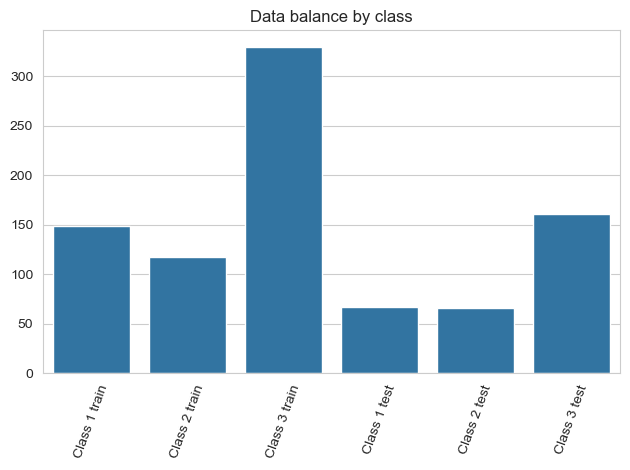

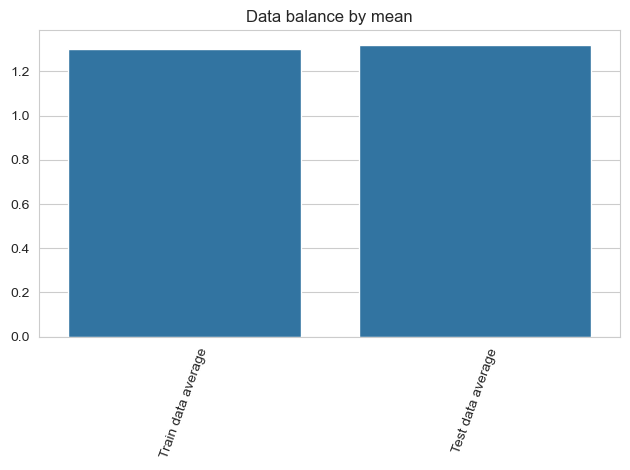

In [23]:
visualize_holdout_balance(, )

#### MLP Model 2

In [24]:
EPOCHS = 
LEARNING_RATE = 

In [25]:
class MLP_2(Module):
    def __init__(self, n_inputs):
        super(MLP_2, self).__init__()
        self.hidden1 = Linear(n_inputs, )
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu') 
        self.act1 = ReLU()
        self.hidden2 = Linear(, )
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(, )
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.hidden4 = Linear(, )
        xavier_uniform_(self.hidden4.weight)
        self.act4 = Softmax(dim=1)
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        return X

Define the neural network

In [26]:
model = MLP_2()

Visualize the network

In [27]:
print(summary(model, input_size=(len(train_dl.dataset), 8), verbose=0))
model.to(device)

Layer (type:depth-idx)                   Output Shape              Param #
MLP_2                                    [597, 3]                  --
├─Linear: 1-1                            [597, 20]                 180
├─ReLU: 1-2                              [597, 20]                 --
├─Linear: 1-3                            [597, 32]                 672
├─ReLU: 1-4                              [597, 32]                 --
├─Linear: 1-5                            [597, 12]                 396
├─ReLU: 1-6                              [597, 12]                 --
├─Linear: 1-7                            [597, 3]                  39
├─Softmax: 1-8                           [597, 3]                  --
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.77
Input size (MB): 0.02
Forward/backward pass size (MB): 0.32
Params size (MB): 0.01
Estimated Total Size (MB): 0.34


MLP_2(
  (hidden1): Linear(in_features=8, out_features=20, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=20, out_features=32, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=32, out_features=12, bias=True)
  (act3): ReLU()
  (hidden4): Linear(in_features=12, out_features=3, bias=True)
  (act4): Softmax(dim=1)
)

### Model 2 settings: Epochs=, LR=, Softmax-4, CEL, SGD

#### Train the model

In [29]:
def train_model(tran_dl, , model):
    liveloss = PlotLosses()

    criterion = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    
    for epoch in range(EPOCHS):
        logs = {}
        model.train()
        running_loss  = 0.0
        running_corrects  = 0.0
        for inputs, labels in train_dl:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.detach() * inputs.size(0)
            
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            
        epoch_loss = running_loss / len(train_dl.dataset)
        epoch_acc = running_corrects.float() / len(train_dl.dataset)
        logs['loss'] = epoch_loss.item()
        logs['accuracy'] = epoch_acc.item()

        model.eval()
        running_loss  = 0.0
        running_corrects  = 0.0
        for inputs, labels in val_dl: 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            
            running_loss += loss.detach() * inputs.size(0)
            
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            
        epoch_loss = running_loss / len(val_dl.dataset)
        epoch_acc = running_corrects.float() / len(val_dl.dataset)
        logs['val_loss'] = epoch_loss.item()
        logs['val_accuracy'] = epoch_acc.item()
        liveloss.update(logs)
        liveloss.send()

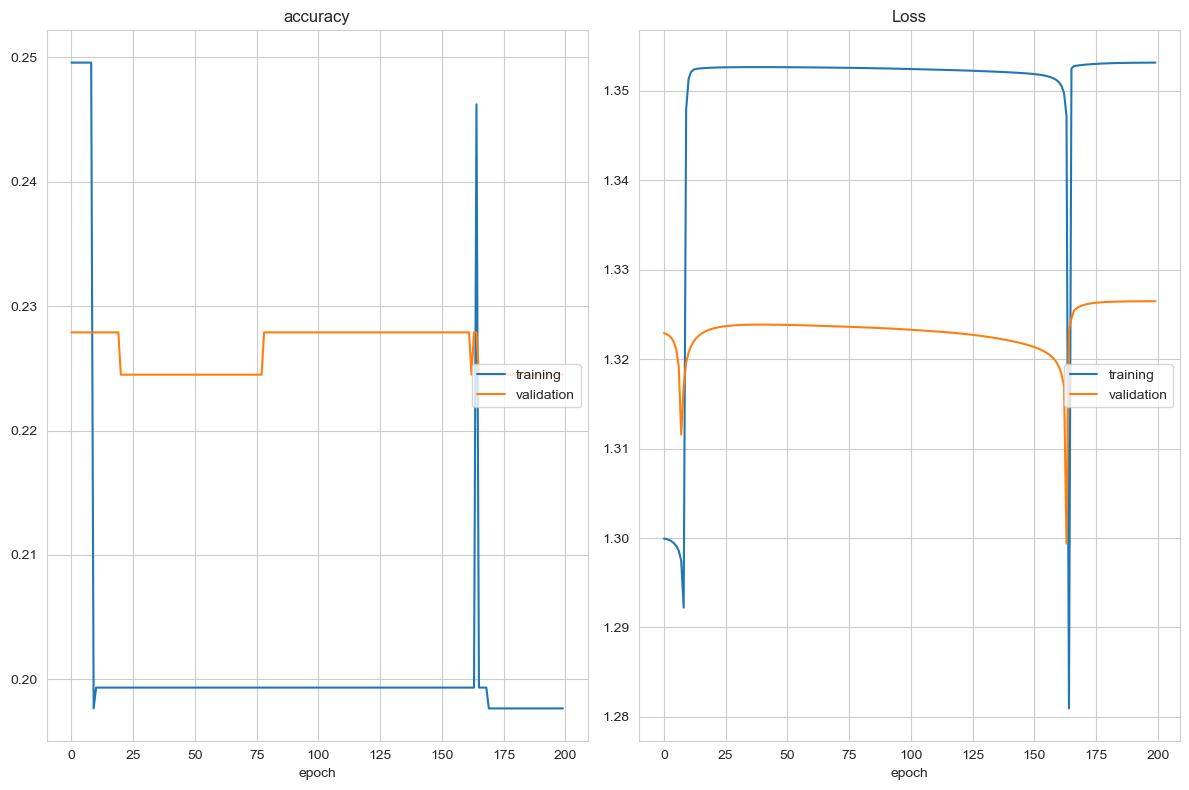

accuracy
	training         	 (min:    0.198, max:    0.250, cur:    0.198)
	validation       	 (min:    0.224, max:    0.228, cur:    0.224)
Loss
	training         	 (min:    1.281, max:    1.353, cur:    1.353)
	validation       	 (min:    1.299, max:    1.326, cur:    1.326)


In [30]:
train_model(train_dl, test_dl, model)

#### Evaluate the model

In [31]:
def evaluate_model(test_dl, model):
    predictions = list()
    actual_values = list()
    for i, (inputs, labels) in enumerate(test_dl):
        yprev = model(inputs)
        yprev = yprev.detach().numpy()
        actual = labels.numpy()
        yprev = np.argmax(yprev, axis=1)
        actual = actual.reshape((len(actual), 1))
        yprev = yprev.reshape((len(yprev), 1))
        predictions.append(yprev)
        actual_values.append(actual)
        break
    predictions, actual_values = np.vstack(predictions), np.vstack(actual_values)
    return predictions, actual_values

In [39]:
def display_confusion_matrix(cm):
    plt.figure(figsize = (16,8))
    sns.heatmap(cm,annot=True,xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'], annot_kws={"size": 12}, fmt='g', linewidths=.5)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

In [40]:
predictions, actual_values = evaluate_model(test_dl, model)

In [46]:
success = 0
failure = 0
for r,p in zip(actual_values, predictions):
    if r==p: success+=1  
    else: failure+=1

In [47]:
acc = accuracy_score(actual_values, predictions)
print(f'Accuracy: {acc:0.3f}\n')
print(f'success:{success} failure:{failure}')

Accuracy: 0.224

success:66 failure:228


In [ ]:
print(classification_report(actual_values, predictions))

#### Apply the model

Make a prediction using one case:

In [44]:
def predict(row, model):
    row = Tensor([row])
    yprev = model(row)
    yprev = yprev.detach().numpy()
    return yprev

In [45]:
row = [5, 0, 1, 0.34, 0, 1, 0.08, 1]
yprev = predict(row, )
print('Predicted: %s (class=%d)' % (yprev, np.argmax(yprev)+1))

Predicted: [[2.2972797e-04 9.9954969e-01 2.2056764e-04]] (class=2)
